In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
apps_data = pd.read_csv("apps.csv")
user_reviews_data = pd.read_csv("user_reviews.csv")

In [ ]:
print(apps_data.head())

In [ ]:
print(user_reviews_data.head())

In [6]:
print(apps_data.isnull().sum())
print(user_reviews_data.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


<ipython-input-7-cfd3bb1268b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")


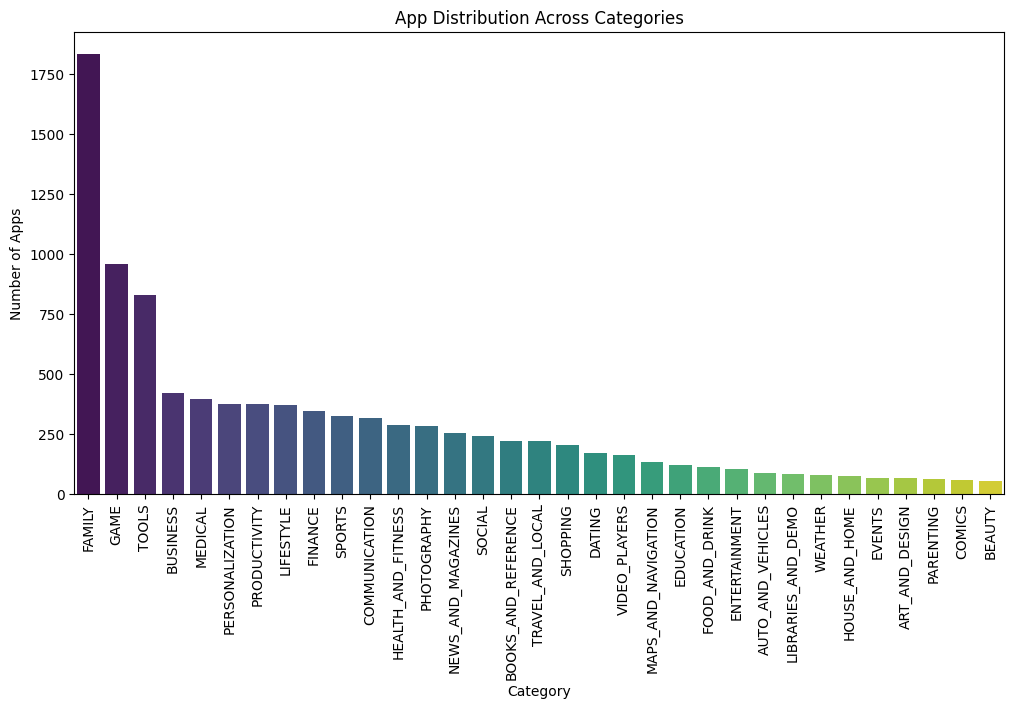

In [7]:
# Category exploration
category_distribution = apps_data['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

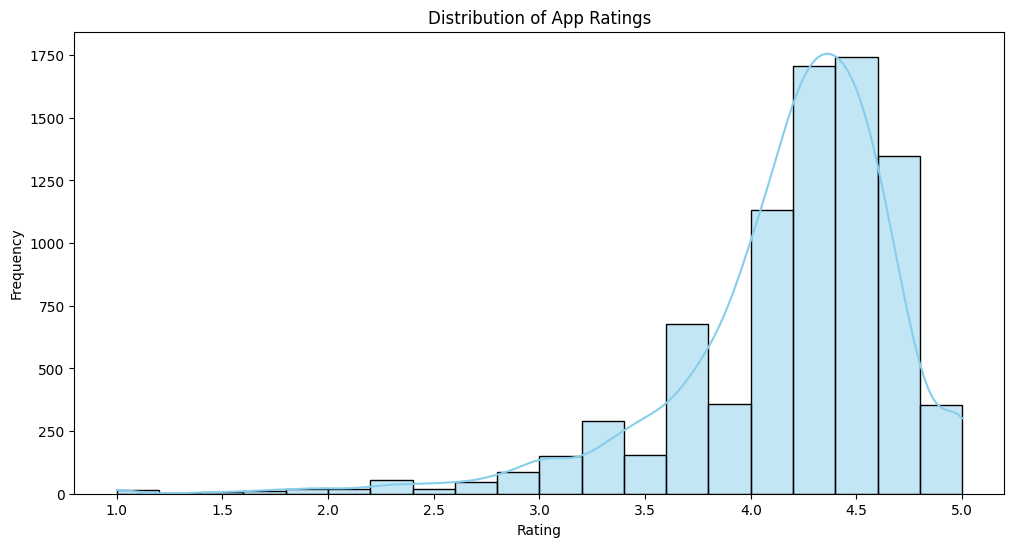

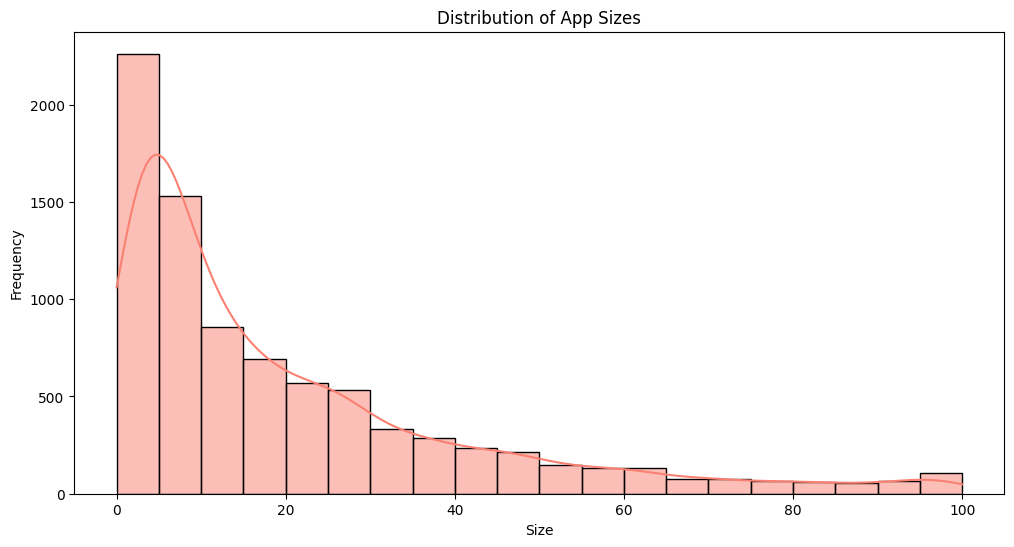

<ipython-input-8-d2824fcb9877>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps_data['Installs'] = apps_data['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
<ipython-input-8-d2824fcb9877>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_distribution.index, y=popularity_distribution.values, palette="viridis")


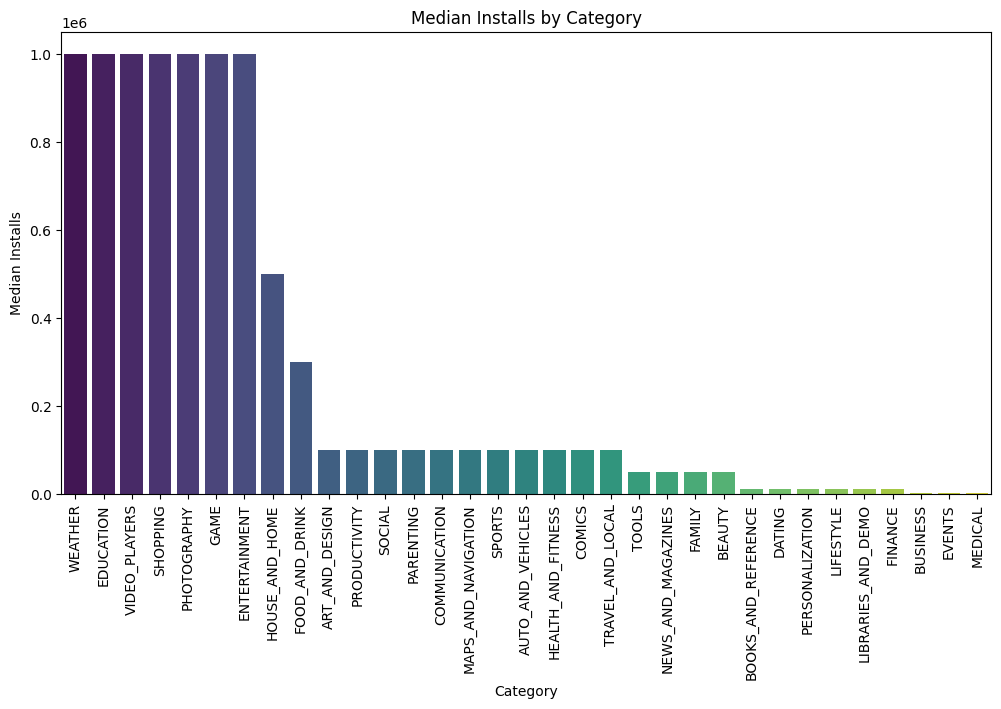

<ipython-input-8-d2824fcb9877>:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps_data['Price'] = apps_data['Price'].str.replace('$', '').astype(float)


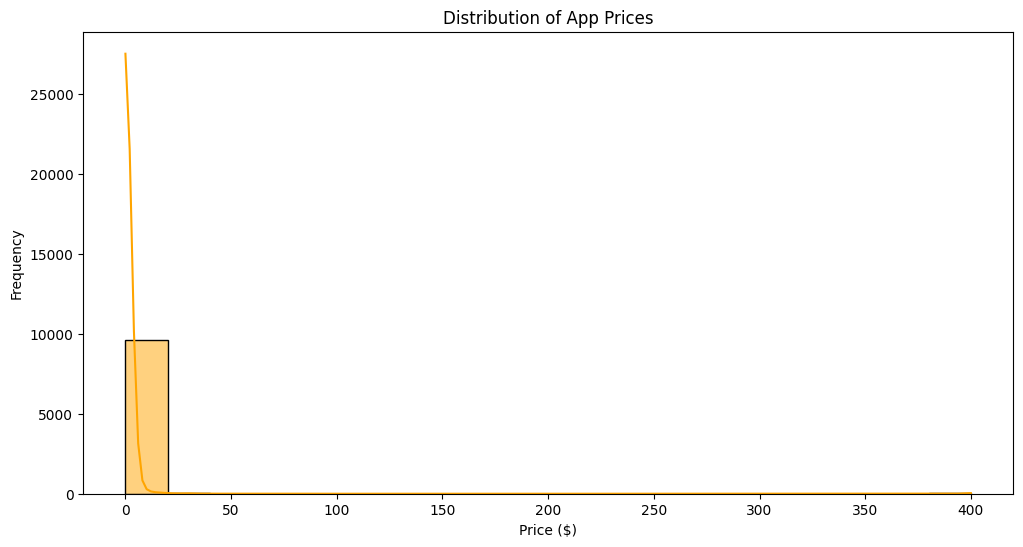

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(apps_data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(apps_data['Size'], bins=20, kde=True, color='salmon')
plt.title('Distribution of App Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

apps_data['Installs'] = apps_data['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

popularity_distribution = apps_data.groupby('Category')['Installs'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=popularity_distribution.index, y=popularity_distribution.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Median Installs by Category')
plt.xlabel('Category')
plt.ylabel('Median Installs')
plt.show()

apps_data['Price'] = apps_data['Price'].str.replace('$', '').astype(float)

plt.figure(figsize=(12, 6))
sns.histplot(apps_data['Price'], bins=20, kde=True, color='orange')
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-9-960bc375050a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="pastel")


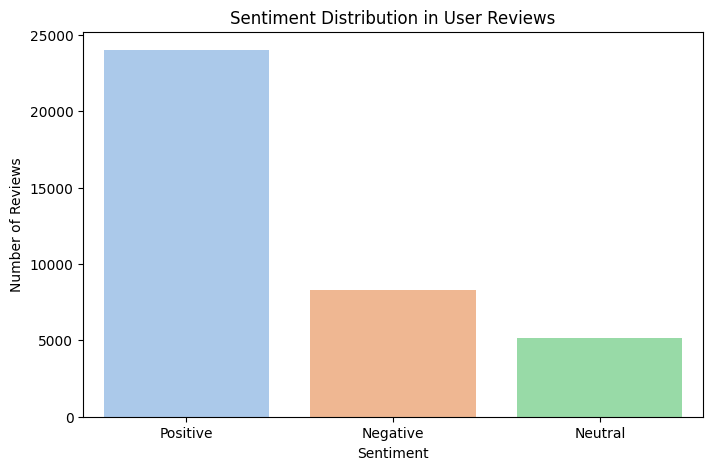

In [9]:
# Sentiment analysis
sentiment_distribution = user_reviews_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette="pastel")
plt.title('Sentiment Distribution in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [10]:
popularity_distribution = apps_data['Installs'].value_counts()
popularity_distribution = popularity_distribution.reset_index()
popularity_distribution.columns = ['Installs', 'Count']

fig = px.bar(popularity_distribution, x='Installs', y='Count', title='App Popularity by Number of Installs')
fig.update_traces(marker_color='skyblue')
fig.show()